In [2]:
#### Addressing the warning for Windows Memory Leak in using K-Means

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

-  ***Accessing Excel Files using openpyxl and Importing Data using Pandas***

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl

In [6]:
import pandas as pd

In [7]:
zoo_class = r"C:\Users\Akash Mittal\Documents\Zoo_Lab\class.xlsx"

In [8]:
animals = r"C:\Users\Akash Mittal\Documents\Zoo_Lab\zoo.xlsx"

-  ***Defining two dataframes for each excel, one for zoo data and other for the classification data***

In [9]:
df_zoo_class = pd.read_excel(zoo_class)

In [10]:
df_animals = pd.read_excel(animals)

In [11]:
#### Just Checking the output dataframes

In [12]:
df_zoo_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [13]:
df_animals.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
#### The data-set is a cleaned and normalized data-set, so we can proceed directly.

In [14]:
# Lets select features we are gonna use for Clustering of Animals.

In [23]:
anim_features = df_animals[["hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize"]]

In [24]:
# Data without animal class_type

In [29]:
X = df_animals.drop(["class_type"], axis = 1)
Y = df_animals["class_type"]

In [30]:
print(X,Y)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [41]:
print(anim_features)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

#### *Applying K-Means CLustering

In [42]:
from sklearn.cluster import KMeans

In [32]:
from sklearn.metrics import silhouette_score

In [43]:
# Initializing the KMeans with n_init=10, to avoid warning for change in values of Kmeans algorithm in later release of ski-kit learn.

In [44]:
kmeans = KMeans(n_clusters=7, random_state=30, n_init=10)

In [45]:
anim_kmean_labels = kmeans.fit_predict(anim_features)

In [46]:
anim_kmeans_silhouette = silhouette_score(anim_features, anim_kmean_labels)

In [47]:
# anim_kmeans_silhouette

In [48]:
## Some Data Manipulation

In [49]:
mean_features = anim_features.mean()

In [50]:
std_dev_features = anim_features.std()

In [51]:
mean_features

hair        0.425743
feathers    0.198020
eggs        0.584158
milk        0.405941
airborne    0.237624
aquatic     0.356436
predator    0.554455
toothed     0.603960
backbone    0.821782
breathes    0.792079
venomous    0.079208
fins        0.168317
legs        2.841584
tail        0.742574
domestic    0.128713
catsize     0.435644
dtype: float64

In [52]:
std_dev_features

hair        0.496921
feathers    0.400495
eggs        0.495325
milk        0.493522
airborne    0.427750
aquatic     0.481335
predator    0.499505
toothed     0.491512
backbone    0.384605
breathes    0.407844
venomous    0.271410
fins        0.376013
legs        2.033385
tail        0.439397
domestic    0.336552
catsize     0.498314
dtype: float64

In [53]:
### Pairwise distances between the points for KMeans algo.

In [54]:
import numpy as np

In [55]:
pair_wise_distance = np.linalg.norm(anim_features.values[:, np.newaxis, :] - anim_features.values, axis=2)

In [56]:
### pairwise_distance_matrix = np.linalg.norm(anim_features.values[:, np.newaxis, :] - anim_features.values, axis=2)

In [57]:
pair_wise_distance

array([[0.        , 1.41421356, 4.89897949, ..., 1.        , 4.79583152,
        3.60555128],
       [1.41421356, 0.        , 4.89897949, ..., 1.        , 4.79583152,
        3.31662479],
       [4.89897949, 4.89897949, 0.        , ..., 4.79583152, 2.64575131,
        3.31662479],
       ...,
       [1.        , 1.        , 4.79583152, ..., 0.        , 4.89897949,
        3.46410162],
       [4.79583152, 4.79583152, 2.64575131, ..., 4.89897949, 0.        ,
        2.82842712],
       [3.60555128, 3.31662479, 3.31662479, ..., 3.46410162, 2.82842712,
        0.        ]])

In [58]:
import matplotlib.pyplot as plt

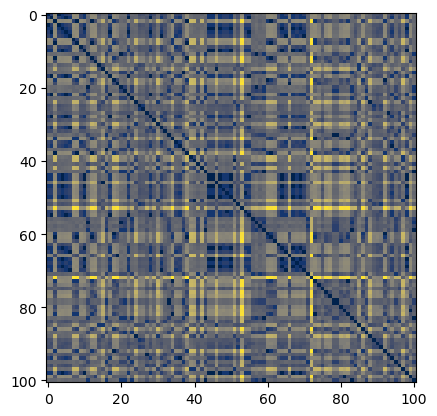

In [59]:
plt.imshow(pair_wise_distance, cmap='cividis', interpolation='none')

In [60]:
# pairwise_distances_matrix = pair_wise_distance.reshape(-1,1)

In [61]:
# pairwise_distances_matrix

In [62]:
kmeans.fit(anim_features)

KMeans(n_clusters=7, n_init=10, random_state=30)

In [63]:
kmeans_labels = kmeans.labels_

In [64]:
silhouette_avg = silhouette_score(pair_wise_distance, kmeans_labels)

In [66]:
print("K-Means Cluster Labels:", kmeans_labels)

K-Means Cluster Labels: [5 5 1 5 5 5 5 1 1 5 5 2 1 3 0 4 2 5 1 1 2 2 5 2 4 0 0 6 5 6 4 5 6 2 1 5 5
 2 1 4 4 2 4 2 5 5 4 5 5 5 5 4 0 4 5 5 2 2 2 2 1 1 1 5 5 5 1 5 5 5 5 2 4 1
 1 6 1 3 2 2 1 3 1 2 6 0 1 2 4 0 0 0 1 6 5 2 6 4 5 3 2]


In [68]:
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5451877008613015


In [69]:
type(kmeans_labels)

numpy.ndarray

In [70]:
### Scatter Plot for the data

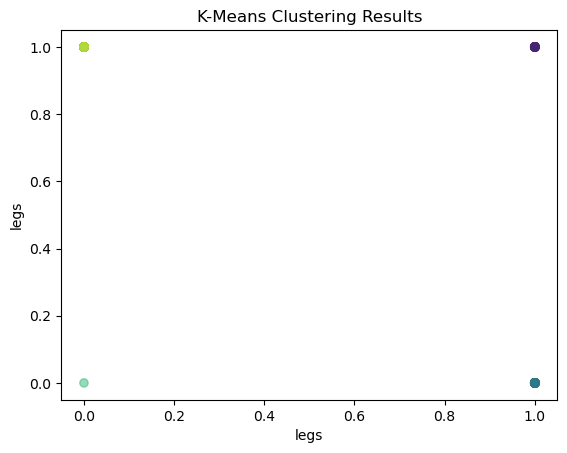

In [74]:
plt.scatter(anim_features['eggs'], anim_features['toothed'], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering Results')
plt.xlabel('legs')
plt.ylabel('legs')
plt.show()

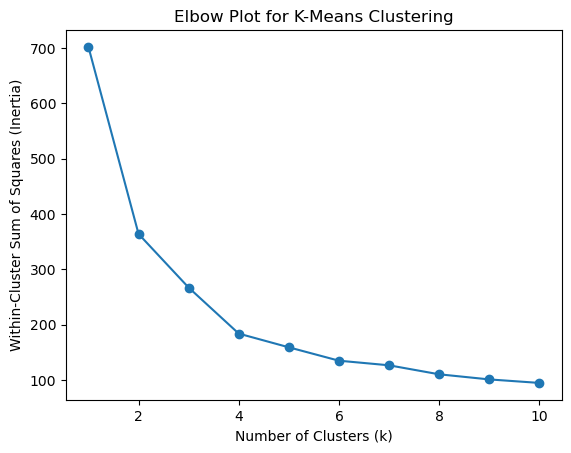

In [75]:
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(anim_features)
    inertia_values.append(kmeans.inertia_)

# Elbow plot
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

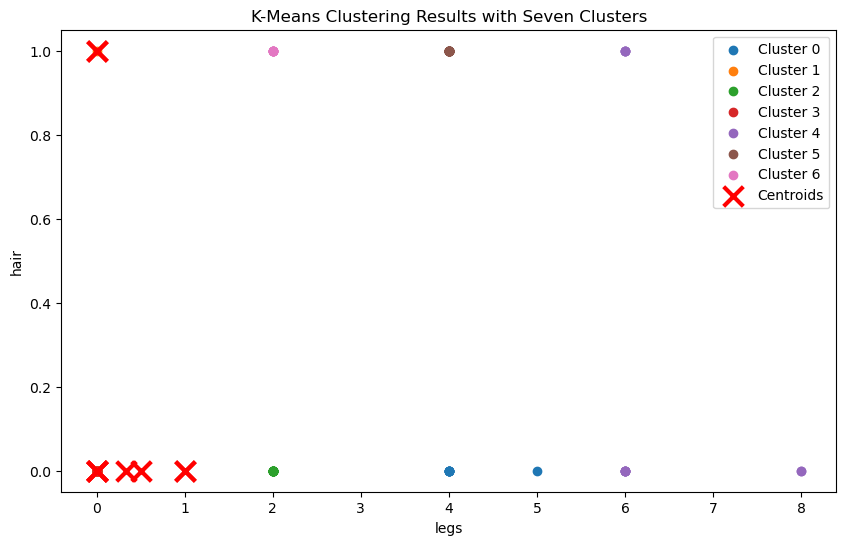

In [76]:
plt.figure(figsize=(10, 6))
for cluster_label in range(7):  # for 7 clusters
    cluster_points = anim_features[kmeans_labels == cluster_label]
    plt.scatter(cluster_points['legs'], cluster_points['hair'], label=f'Cluster {cluster_label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
plt.title('K-Means Clustering Results with Seven Clusters')
plt.xlabel('legs')
plt.ylabel('hair')
plt.legend()
plt.show()

In [77]:
df_animals

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


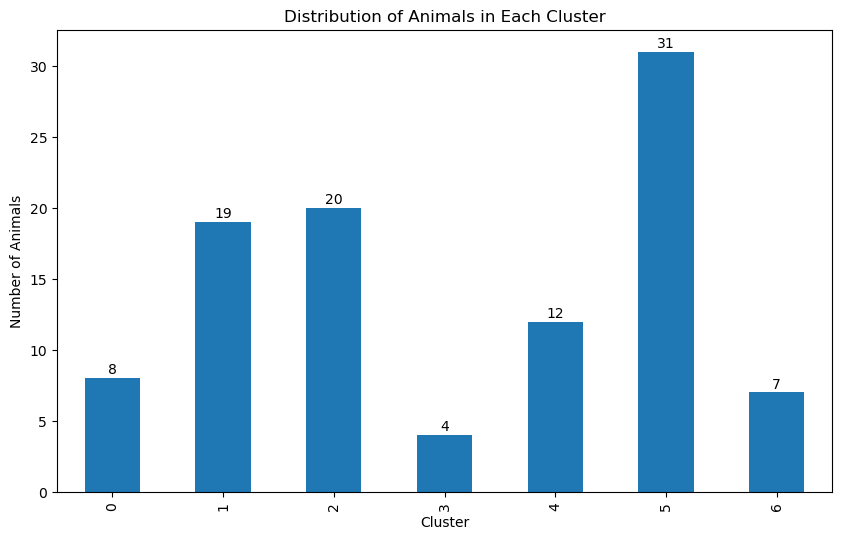

In [78]:
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()

ax = cluster_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Distribution of Animals in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Animals')



for i, count in enumerate(cluster_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [48]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

# Assuming 'anim_features' is your DataFrame with selected features

# Fit Affinity Propagation to the data
affinity_propagation = AffinityPropagation()
affinity_propagation.fit(anim_features)

# Get cluster labels
affinity_labels = affinity_propagation.labels_

# Get silhouette score
silhouette_avg = silhouette_score(anim_features, affinity_labels)

# Print the cluster labels assigned by Affinity Propagation
print("Affinity Propagation Cluster Labels:", affinity_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Affinity Propagation Cluster Labels: [8 8 0 8 8 8 8 0 0 8 8 4 0 6 1 1 4 8 0 5 4 4 8 4 3 2 2 7 8 7 3 8 7 4 0 8 8
 4 0 3 3 4 3 4 8 8 1 8 8 8 8 3 2 1 8 8 4 4 4 4 0 0 0 8 8 8 5 8 8 8 8 4 1 0
 5 7 0 6 4 4 0 6 0 4 7 1 0 4 3 2 4 2 0 7 8 4 7 3 8 6 4]
Silhouette Score: 0.5094220388007568
